## Titanic Data Set

https://www.kaggle.com/competitions/titanic/data -> link

train.csv -> File

In [1]:
import pandas as pd #Importing Pandas data library to manipulate the data and clean and preprocess the data
import numpy as np
import plotly.express as px #importing plotless express for quick visualizations
import plotly.graph_objects as go #importing graph objects
import plotly.figure_factory as ff #importing figure factory 
import plotly.subplots as sp


In [2]:
df = pd.read_csv('train.csv') # using pandas library to read the imported the database and assign to 'df' variable. 
pd.set_option('display.max_columns', None) #expanding hidden columns
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
unique_values = df.apply(lambda x: x.unique()) # Checking the unique values for each column
print(unique_values)

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object


In [5]:
df.dtypes #checking if the data types are in order

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Checking if null values

In [6]:
df.isnull().sum().sum()  #checking the total number of null values

# 866 nTotal null value

866

In [7]:
df.isnull().sum() #identifying what attributes have the null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
cabin_values = df['Cabin'].unique()
cabin_values


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df['Cabin'].value_counts().unique()

array([4, 3, 2, 1], dtype=int64)

In [11]:
df.Cabin = df.Cabin.fillna('Unknown') #replacing all null values in attribute cabin as 'unknown'
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

Filling all Age == Null values to mean values

In [12]:
fig = px.box(df, x='Pclass', y='Age', color='Pclass', template='plotly_dark')
fig.show()

In [13]:
def age_fill(a):
    Age = a[0]
    Pclass = a[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 24
        
    else:
        return Age
    
    

In [14]:
df['Age'] = df[['Age', 'Pclass']].apply(age_fill, axis=1)

In [15]:
df.isnull().sum() #identifying what attributes have the null values.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Replacing the two null values in 'Embarked' with the most repeated by the mode value

In [16]:
df.Embarked.mode() #checking the mode value

0    S
Name: Embarked, dtype: object

In [17]:
df.Embarked = df.Embarked.fillna('S') #filling the two null values with 'S' as it is the most repeated.
df.isnull().sum() #checking if all values are clean and ready for data exploration.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df['Age'].astype(int) #chhanging dtype Age to int data type from float

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    24
889    26
890    32
Name: Age, Length: 891, dtype: int32

Rename Attribute sibssp and parch

In [19]:
df.rename(columns={'SibSp':'Siblings/Spouses'},inplace=True)
df.rename(columns={'Parch':'Parents/Children'},inplace=True)

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings/Spouses,Parents/Children,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:

fig = px.violin(df, y='Age', x='Pclass', box=False, points='all', color='Survived', 
                title = "Distribution of Age by Passenger Class and Survival Status on the Titanic", 
                template='plotly_dark')
fig.show()


Exploratory Data Analysis

In [22]:
fig = go.Figure(data=[go.Histogram(x=df[df['Survived']==1]['Sex'], name='Survived'),
                     go.Histogram(x=df[df['Survived']==0]['Sex'], name='Did not survive')])

fig.update_layout(title="Titanic Survival Counts by 'Sex'",
                  xaxis=dict(title='Sex'),
                  yaxis=dict(title='Count'),
                  barmode='stack', template = 'plotly_dark')

fig.show()

In [23]:
unservived_female = df.loc[(df['Sex']=='female') & (df['Survived']==0)]
unservived_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings/Spouses,Parents/Children,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,Unknown,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,Unknown,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,Unknown,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,Unknown,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,Unknown,S


In [24]:
fig = px.bar(unservived_female, 
             x='Age', y='Fare', color='Pclass', 
             title="Fare Distribution by Age, Passenger Class of Unsurvived Female Passengers on the Titanic", 
             template='plotly_dark')
fig.show()


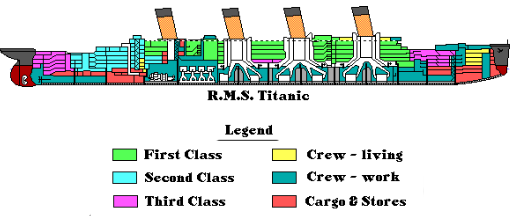

https://titanicll.wordpress.com/titanic-ii-cabins/

Survival Rrate

In [25]:
total_passengers = df['Survived'].count()
total_passengers

891

In [26]:
total_survived = df['Survived'].sum()
total_survived

342

In [27]:
surival_rate_sum = df.groupby(['Sex'])['Survived'].sum()
surival_rate_sum

Sex
female    233
male      109
Name: Survived, dtype: int64

In [28]:
surival_rate_count = df.groupby(['Sex'])['Survived'].count()
surival_rate_count

Sex
female    314
male      577
Name: Survived, dtype: int64

In [29]:
surival_rate_mean = df.groupby(['Sex'])['Survived'].mean()
surival_rate_mean

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [30]:
fig = go.Figure(data=[go.Pie(labels=surival_rate_mean.index, values=surival_rate_mean.values)])
fig.update_layout(title='Survival Rate by Gender', template = 'plotly_dark')
fig.show()

In [31]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], 
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
df = df.sort_values(by='AgeGroup')

fig = px.histogram(df, x='AgeGroup', y='Survived', color='Sex', nbins=8)

fig.update_layout(title="Total Survival Count by Age group and Sex",
                  xaxis=dict(title='AgeGroup'),
                  yaxis=dict(title='Survived Count'),
                  barmode='stack', 
                  template='plotly_dark')
fig.show()

In order to analyze understanding the total number of deaths and total count of travelers

In [32]:
print(df['Age'].min())
print(df['Age'].max())

0.42
80.0


In [33]:
cols = ['Fare','Pclass','Sex','Siblings/Spouses','Parents/Children','Embarked']
n_rows = 2
n_cols = 3

fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=cols, vertical_spacing=0.3)

for r in range (1,n_rows+1):
    for c in range(1,n_cols+1):
        i = (r-1)*n_cols + c-1 
        fig.add_trace(go.Histogram(x=df[df['Survived']==1][cols[i]], name='Survived', showlegend=True), row=r, col=c)
        fig.add_trace(go.Histogram(x=df[df['Survived']==0][cols[i]], name='Did not survive', showlegend=True), row=r, col=c)
        

fig.update_layout(title="Comparison of Survival Count by Various Attributes on the Titanic",
                  xaxis=dict(title='Attributes'),
                  yaxis=dict(title='Count'),
                  template = 'plotly_dark',
                  barmode='stack')

fig.show()


In [34]:
sum_fare_pclass = df.pivot_table('Fare', ['AgeGroup'], 'Pclass', aggfunc='sum')
sum_fare_pclass

Pclass,1,2,3
AgeGroup,,,
0-10,384.9583,488.5834,1074.2624
10-20,2053.9125,376.8208,965.1628
20-30,3856.6333,1387.5875,3371.8326
30-40,6678.3540,889.4750,835.6247
40-50,2740.9752,408.5000,390.5584
50-60,1623.0125,219.3750,38.1542
60-70,725.4083,31.5000,23.5750
70-80,114.1584,0.0000,15.5250


In [35]:
mean_fare_pclass = df.pivot_table('Fare', ['AgeGroup'], 'Pclass')
mean_fare_pclass

Pclass,1,2,3
AgeGroup,,,
0-10,128.319433,28.740200,24.415055
10-20,114.106250,20.934489,12.217251
20-30,96.415832,19.272049,12.723897
30-40,84.536127,20.685465,13.263884
40-50,74.080411,21.500000,13.018613
50-60,64.920500,18.281250,7.630840
60-70,65.946209,10.500000,7.858333
70-80,38.052800,NaN,7.762500


In [36]:
#Look at survival rate by sex, age and class

age = pd.cut(df['Age'], [0,18,80]) # break age to 0 to 18 and 18 to 80

df.pivot_table('Survived', ['Sex', age], 'Pclass')


Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

In [37]:
fig = px.scatter(df, x = 'Age', y = 'Fare', color = 'Sex', size = 'Age',animation_frame='Survived', title="Scatter Plot of Fare vs Age by Gender and Survival Status on the Titanic", template='plotly_dark')
fig.show()

In [38]:
fig = px.bar(df, x = 'Fare', y='Sex', color='Embarked', title='Fare Distribution by Gender and Embarkation Location on the Titanic', template='plotly_dark')
fig.show()

Analyzing the Data Based on the Age Groups (18 Below and 18 Above)

In [39]:
df_18_below = df.loc[(df['Age']<18)] #created a new data frame below 18 
df_18_above = df.loc[(df['Age']>19)] #created a new data frame above 18

In [40]:
fig = px.bar(df_18_below, x = 'Fare', y='Sex', color='Pclass', title='Fare Distribution by Gender and Passenger Class on the Titanic', template='plotly_dark')
fig.show()

In [41]:
fig = px.density_heatmap(df_18_below, 
                         x="Pclass", 
                         y="Survived",
                         marginal_x="histogram", 
                         marginal_y="histogram", 
                         title='Survival Rate by Passenger Class on the Titanic', 
                         template="plotly_dark")
fig.show()

In [42]:
test = df.pivot_table(values='Survived', index='Sex', columns=['Pclass', 'Embarked'])
test_df = pd.DataFrame(test)
test_df

Pclass           1                  2                        3            \
Embarked         C    Q        S    C    Q         S         C         Q   
Sex                                                                        
female    0.976744  1.0  0.96000  1.0  1.0  0.910448  0.652174  0.727273   
male      0.404762  0.0  0.35443  0.2  0.0  0.154639  0.232558  0.076923   

Pclass              
Embarked         S  
Sex                 
female    0.375000  
male      0.128302